In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import autokeras as ak
from numpy import random
import time

In [55]:
#Plot's Making  Packages
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import ListedColormap, LinearSegmentedColormap, BoundaryNorm
from matplotlib.collections import LineCollection
from matplotlib import cm

%config InlineBackend. figure_format = 'retina'

In [56]:
data = np.load('/work/n1000000_0803.npz')

In [57]:
input_state = 2
if input_state == 0:
    model = tf.keras.models.load_model('/work/Regression/models_ve_dune/0716_theta23,delta_1.h5')
    model.summary()
elif input_state == 1:
    model_theta23 = tf.keras.models.load_model('/work/Regression/models_all_dune/0716_theta23_1.h5')
    model_theta23.summary()
    model_delta = tf.keras.models.load_model('/work/Regression/models_all_dune/0716_delta1.h5')
    model_delta.summary()
elif input_state == 2:
    model_theta23 = tf.keras.models.load_model('/work/Regression/models_all/0804_theta23_1.h5')
    model_theta23.summary()
    model_delta = tf.keras.models.load_model('/work/Regression/models_all/0804_delta1.h5')
    model_delta.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 244)]             0         
_________________________________________________________________
multi_category_encoding (Mul (None, 244)               0         
_________________________________________________________________
normalization (Normalization (None, 244)               489       
_________________________________________________________________
dense (Dense)                (None, 1024)              250880    
_________________________________________________________________
re_lu (ReLU)                 (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                32800     
_________________________________________________________________
re_lu_1 (ReLU)               (None, 32)               

In [58]:
target = np.column_stack([data['theta23'], data['delta']])
if input_state == 0:
    data_all = data['ve_dune']
elif input_state == 1:
    data_all = np.column_stack([data['ve_dune'], data['vu_dune'], data['vebar_dune'], data['vubar_dune']])
elif input_state == 2:
    data_all = np.column_stack([data['ve_dune'], data['vu_dune'], data['vebar_dune'], data['vubar_dune'], data['ve_t2hk'], data['vu_t2hk'], data['vebar_t2hk'], data['vubar_t2hk']])

x_test = data_all[900000:]
y_test = target[900000:]

In [59]:
data_IO = np.load('/work/NuFit_IO.npz')
data_NO = np.load('/work/NuFit_NO.npz')

if input_state == 0:
    data_IO_mid = data_IO['ve_dune'][0]
    data_NO_mid = data_NO['ve_dune'][0]
elif input_state == 1:
    data_IO_mid = np.column_stack([data_IO['ve_dune'], data_IO['vu_dune'], data_IO['vebar_dune'], data_IO['vubar_dune']])[0]
    data_NO_mid = np.column_stack([data_NO['ve_dune'], data_NO['vu_dune'], data_NO['vebar_dune'], data_NO['vubar_dune']])[0]
elif input_state == 2:
    data_IO_mid = np.column_stack([data_IO['ve_dune'], data_IO['vu_dune'], data_IO['vebar_dune'], data_IO['vubar_dune'], data_IO['ve_t2hk'], data_IO['vu_t2hk'], data_IO['vebar_t2hk'], data_IO['vubar_t2hk']])[0]
    data_NO_mid = np.column_stack([data_NO['ve_dune'], data_NO['vu_dune'], data_NO['vebar_dune'], data_NO['vubar_dune'], data_NO['ve_t2hk'], data_NO['vu_t2hk'], data_NO['vebar_t2hk'], data_NO['vubar_t2hk']])[0]

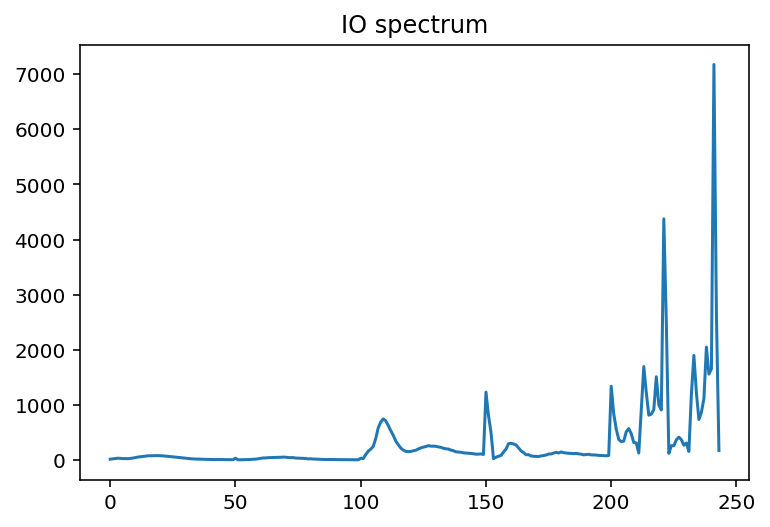

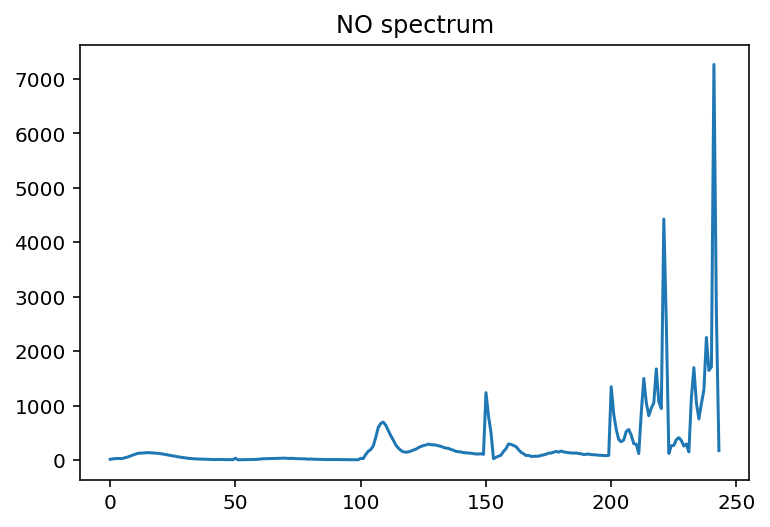

In [60]:
plt.plot(data_IO_mid)
plt.title('IO spectrum')
plt.show()
plt.plot(data_NO_mid)
plt.title('NO spectrum')
plt.show()

In [61]:
pre_IO_mid_theta23 = model_theta23.predict(data_IO_mid[np.newaxis, :])[0][0]
print('pre_IO_mid_theta23:', pre_IO_mid_theta23)
pre_IO_mid_delta = model_delta.predict(data_IO_mid[np.newaxis, :])[0][0]
print('pre_IO_mid_delta:', pre_IO_mid_delta)
pre_NO_mid_theta23 = model_theta23.predict(data_NO_mid[np.newaxis, :])[0][0]
print('pre_NO_mid_theta23:', pre_NO_mid_theta23)
pre_NO_mid_delta = model_delta.predict(data_NO_mid[np.newaxis, :])[0][0]
print('pre_NO_mid_delta:', pre_NO_mid_delta)

pre_IO_mid_theta23: 49.273666
pre_IO_mid_delta: 286.63263
pre_NO_mid_theta23: 49.008747
pre_NO_mid_delta: 195.54137


In [62]:
%%time
N = 1000000
statistics_state = 1

if statistics_state == 0:
    std = 0.01
    data_create_IO = [np.array(random.normal(data_IO_mid, std*data_IO_mid)) for i in range(N)]
    data_create_NO = [np.array(random.normal(data_NO_mid, std*data_NO_mid)) for i in range(N)]
elif statistics_state == 1:
    data_create_IO = [np.array(random.poisson(data_IO_mid)) for i in range(N)]
    data_create_NO = [np.array(random.poisson(data_NO_mid)) for i in range(N)]

CPU times: user 2min 20s, sys: 282 ms, total: 2min 20s
Wall time: 2min 20s


In [63]:
%%time
N = 1000000
statistics_state = 1

if statistics_state == 0:
    std = 0.01
    data_create_IO = random.normal(data_IO_mid, std*data_IO_mid, size = (N, len(data_IO_mid)))
    data_create_NO = random.normal(data_NO_mid, std*data_NO_mid, size = (N, len(data_IO_mid)))
elif statistics_state == 1:
    data_create_IO = random.poisson(data_IO_mid, size = (N, len(data_IO_mid)))
    data_create_NO = random.poisson(data_NO_mid, size = (N, len(data_NO_mid)))

CPU times: user 1min 6s, sys: 1.96 s, total: 1min 8s
Wall time: 1min 8s


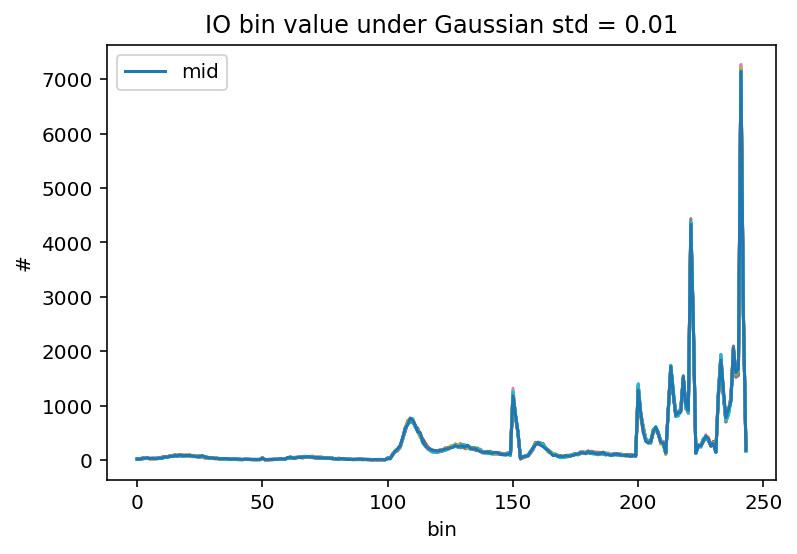

In [64]:
plt.plot(data_IO_mid, label = 'mid')
for i in range(10):
    plt.plot(data_create_IO[i])
plt.title('IO bin value under Gaussian std = {}'.format(std))
# plt.title('IO bin value under poisson')
plt.xlabel('bin')
plt.ylabel('#')
plt.legend()

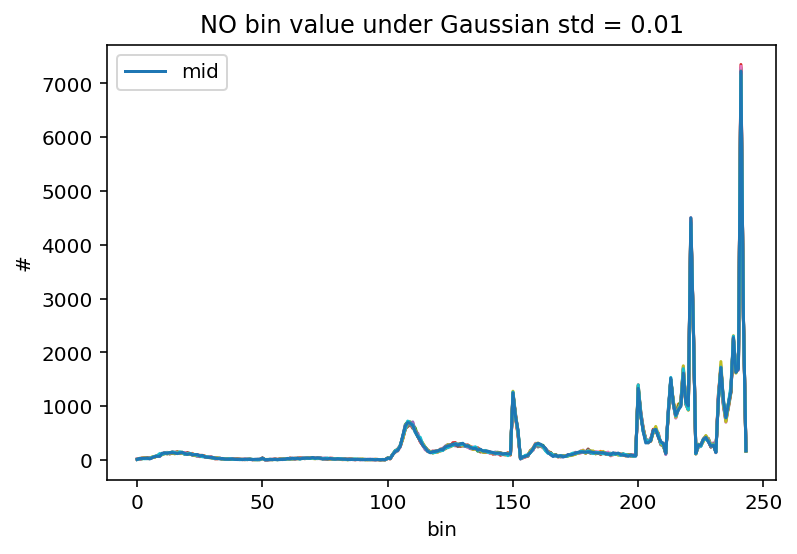

In [65]:
plt.plot(data_NO_mid, label = 'mid')
for i in range(10):
    plt.plot(data_create_NO[i])
plt.title('NO bin value under Gaussian std = {}'.format(std))
# plt.title('NO bin value under poisson')
plt.xlabel('bin')
plt.ylabel('#')
plt.legend()

In [66]:
%%time
pre_create_IO_theta23 = model_theta23.predict(np.array(data_create_IO))
pre_create_NO_theta23 = model_theta23.predict(np.array(data_create_NO))

CPU times: user 13min 2s, sys: 3min 9s, total: 16min 12s
Wall time: 5min 21s


In [67]:
bins_theta23 = np.arange(49, 50, 0.1)
bins_delta = np.arange(100, 250, 1)

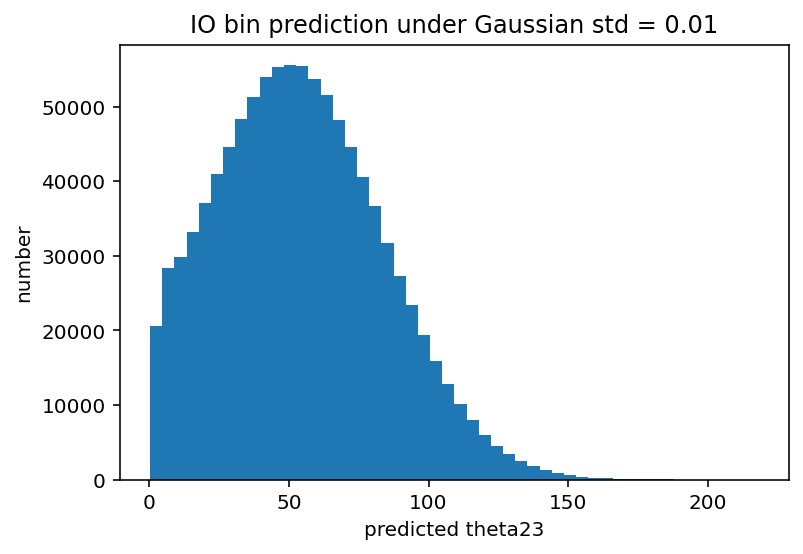

In [68]:
plt.hist(pre_create_IO_theta23, bins = 50)
plt.xlabel('predicted theta23')
plt.ylabel('number')
plt.title('IO bin prediction under Gaussian std = {}'.format(std))
# plt.title('IO under poisson')
plt.show()

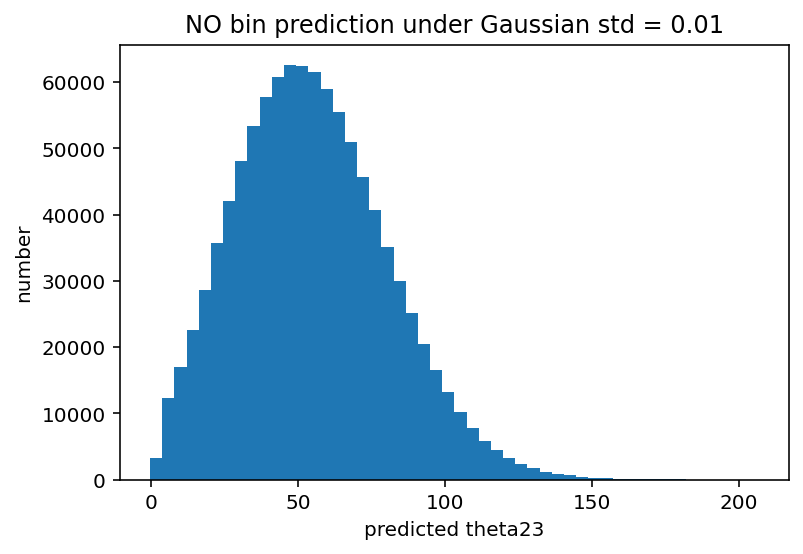

In [69]:
plt.hist(pre_create_NO_theta23, bins = 50)
plt.xlabel('predicted theta23')
plt.ylabel('number')
plt.title('NO bin prediction under Gaussian std = {}'.format(std))
# plt.title('NO under poisson')
plt.show()

In [70]:
%%time
pre_create_IO_delta = model_delta.predict(np.array(data_create_IO))
pre_create_NO_delta = model_delta.predict(np.array(data_create_NO))

CPU times: user 9min 56s, sys: 2min 31s, total: 12min 28s
Wall time: 4min 45s


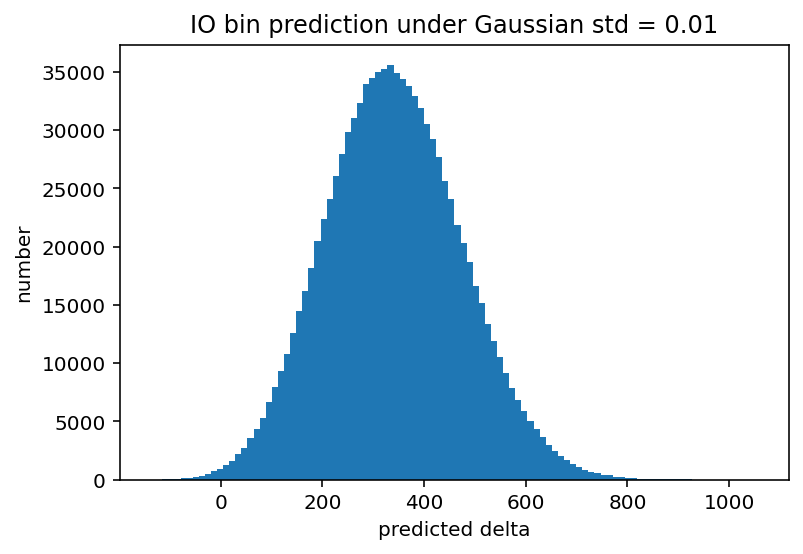

In [71]:
plt.hist(pre_create_IO_delta, bins = 100)
plt.xlabel('predicted delta')
plt.ylabel('number')
plt.title('IO bin prediction under Gaussian std = {}'.format(std))
# plt.title('IO under poisson')
plt.show()

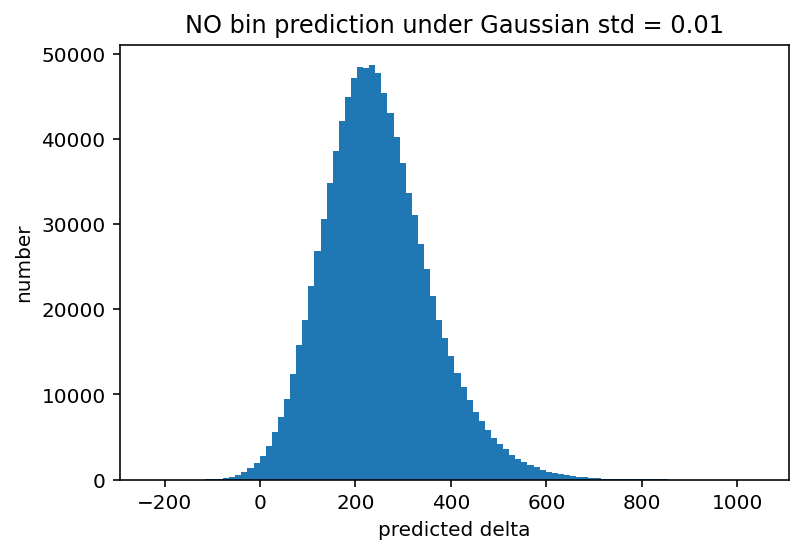

In [72]:
plt.hist(pre_create_NO_delta, bins = 100)
plt.xlabel('predicted delta')
plt.ylabel('number')
plt.title('NO bin prediction under Gaussian std = {}'.format(std))
# plt.title('NO under poisson')
plt.show()

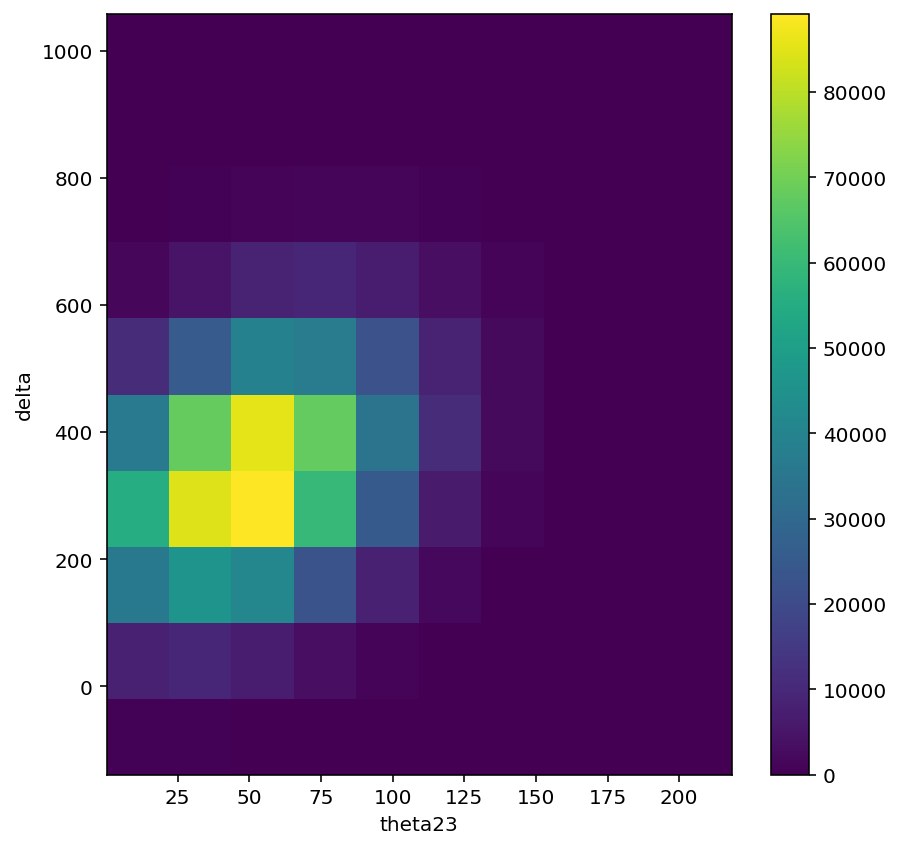

In [73]:
plt.figure(figsize=(7,7))
plt.hist2d(pre_create_IO_theta23[:,0], pre_create_IO_delta[:,0]
#             , bins = [bins_theta23, bins_delta]
          )
plt.xlabel('theta23')
plt.ylabel('delta')
plt.colorbar()
plt.show()

In [74]:
print(max(pre_create_IO_theta23[:,0]))
print(min(pre_create_IO_theta23[:,0]))
print(max(pre_create_IO_delta[:,0]))
print(min(pre_create_IO_delta[:,0]))

218.33464
0.2542724
1058.4058
-138.65843


In [80]:
%%time

IO_or_NO = 1 # 0 for IO and 1 for NO

if IO_or_NO == 0:
    bins_theta23 = np.linspace(min(pre_create_IO_theta23[:,0]), max(pre_create_IO_theta23[:,0]), 100)
    bins_delta = np.linspace(min(pre_create_IO_delta[:,0]), max(pre_create_IO_delta[:,0]), 100)

    likeliregion, xedges, yedges = np.histogram2d(pre_create_IO_theta23[:,0], pre_create_IO_delta[:,0], bins = [bins_theta23,bins_delta])

    max_poi = np.where(likeliregion == likeliregion.max())

    sorted_list = np.sort(likeliregion.reshape((len(xedges)-1)*(len(yedges)-1)))[::-1]
else:
    bins_theta23 = np.linspace(min(pre_create_NO_theta23[:,0]), max(pre_create_NO_theta23[:,0]), 100)
    bins_delta = np.linspace(min(pre_create_NO_delta[:,0]), max(pre_create_NO_delta[:,0]), 100)

    likeliregion, xedges, yedges = np.histogram2d(pre_create_NO_theta23[:,0], pre_create_NO_delta[:,0], bins = [bins_theta23,bins_delta])

    max_poi = np.where(likeliregion == likeliregion.max())

    sorted_list = np.sort(likeliregion.reshape((len(xedges)-1)*(len(yedges)-1)))[::-1]   

onesigma = 0
for i in range(len(sorted_list)):
    onesigma += sorted_list[i]
    if onesigma/sorted_list.sum() >= 0.68:
        one_sigma_poi = i
        break
        
twosigma = 0
for i in range(len(sorted_list)):
    twosigma += sorted_list[i]        
    if twosigma/sorted_list.sum() >= 0.95:
        two_sigma_poi = i
        break

print("one_sigma_poi ", one_sigma_poi)
one_sigma_region = np.where(likeliregion < sorted_list[one_sigma_poi], 0, likeliregion )
one_sigma_region_boundary = np.where(one_sigma_region > 1, 1, one_sigma_region )
one_sigma_allowed_region = np.where(one_sigma_region_boundary != 0)

print("two_sigma_poi ", two_sigma_poi)
two_sigma_region = np.where(likeliregion < sorted_list[two_sigma_poi], 0, likeliregion )
two_sigma_region_boundary = np.where(two_sigma_region > 1, 1, two_sigma_region )
two_sigma_allowed_region = np.where(two_sigma_region_boundary != 0)

one_sigma_poi  657
two_sigma_poi  1724
CPU times: user 1.1 s, sys: 0 ns, total: 1.1 s
Wall time: 1.08 s


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: No contour levels were found within the data range.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: No contour levels were found within the data range.
  if __name__ == '__main__':


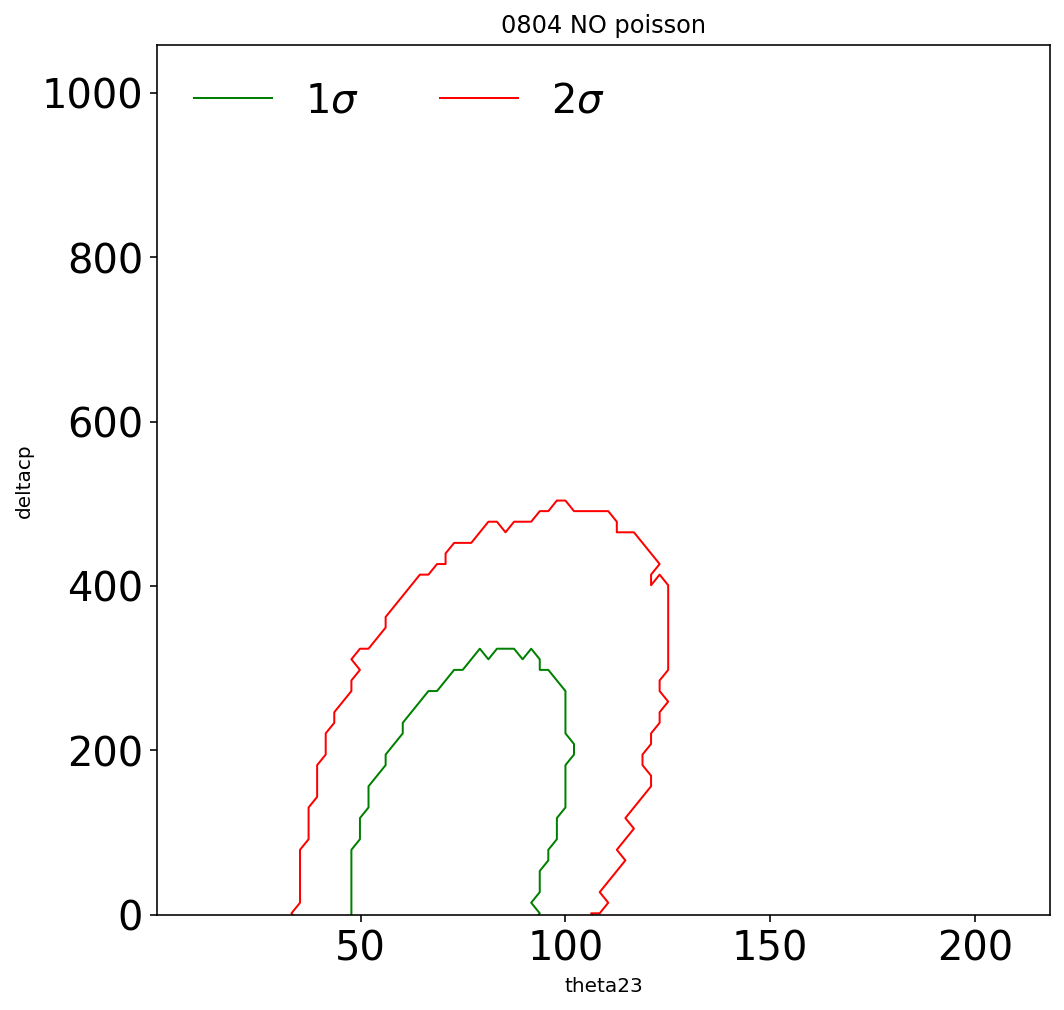

CPU times: user 1.44 s, sys: 11.5 ms, total: 1.45 s
Wall time: 1.44 s


In [81]:
%%time
fig, ax = plt.subplots(1,1, figsize=(8,8))

# Python contour plot
# Ref: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.contour.html
# Ref: https://matplotlib.org/stable/gallery/images_contours_and_fields/contour_demo.html

X, Y = np.meshgrid(xedges[:-1], yedges[:-1])
CS_1_sigma = plt.contour(X, Y, one_sigma_region_boundary, 0, colors='green', linestyles="-", linewidths=1)
CS_2_sigma = plt.contour(X, Y, two_sigma_region_boundary, 0, colors='red', linestyles="-", linewidths=1)

# plt.clabel(CS_1_sigma, inline=True, fontsize=10)

CS_1_sigma.collections[0].set_label("1$\sigma$")
CS_2_sigma.collections[0].set_label("2$\sigma$")

# plt.xlim((-0.8,0.8))
# plt.xlim((0.,0.09))
# plt.xlim((49.277,49.279))
# plt.ylim((289.70,289.75))

plt.ylim((min(pre_create_IO_delta[:,0]), max(pre_create_IO_delta[:,0])))
plt.xlim((min(pre_create_IO_theta23[:,0]), max(pre_create_IO_theta23[:,0])))
plt.ylim((0, max(pre_create_IO_delta[:,0])))

ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
# plt.xlabel("cos($\\beta$ - $\\alpha$)", fontsize=25, horizontalalignment='right',x=1)
# plt.ylabel('$m_{12}^2$ [$\mathrm{GeV}^2$]', fontsize=25,horizontalalignment='right',y=1)
plt.legend(loc="upper left", ncol=2, fontsize=20, markerscale=2., scatterpoints=1,
           edgecolor = "w",fancybox=False, framealpha=0) #bbox_to_anchor=(0.7, 0.1),
# plt.ticklabel_format(style='plain')
# plt.grid()
# plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.xlabel('theta23')
plt.ylabel('deltacp')
if IO_or_NO == 0:
    if statistics_state == 0: plt.title('0804 IO gaussian, std = {}'.format(std))
    if statistics_state == 1: plt.title('0804 IO poisson')
else: 
    if statistics_state == 0: plt.title('0804 NO gaussian, std = {}'.format(std))
    if statistics_state == 1: plt.title('0804 NO poisson')
plt.show()

In [77]:
delta = 0.5
x = np.arange(-3.0, 3.0, delta)
y = np.arange(-2.0, 2.0, delta)
print(len(y))
X, Y = np.meshgrid(x, y)
print(X.shape)

Z1 = np.exp(-X**2 - Y**2)
Z2 = np.exp(-(X - 1)**2 - (Y - 1)**2)
Z = (Z1 - Z2) * 2

8
(8, 12)


Text(0.5, 1.0, 'Single color - negative contours dashed')

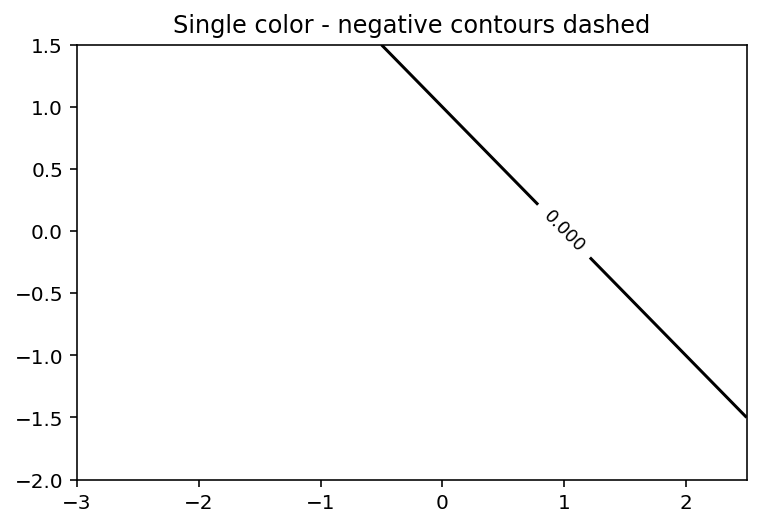

In [78]:
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z, 0, colors='k')  # Negative contours default to dashed.
ax.clabel(CS, fontsize=9, inline=True)
ax.set_title('Single color - negative contours dashed')